> 참고자료
- 파이썬 라이브러리를 활용한 데이터 분석 - 3rd edition by 웨스 맥키니

# 1. Numpy 기초: 배열과 벡터 연산

## 1.1. NumPy란?

- NumPy는 Numerical Python의 줄임말
- 파이썬에서 산술 계산을 위한 가장 중요한 필수 패키지 중 하나임.
- 과학 계산을 위한 대부분의 패키지는 NumPy의 배열 객체를 데이터 교환을 위한 공통 언어처럼 사용함.
- NumPy에서 제공하는 것
    - 효율적인 다차원 배열인 ndarray는 빠른 배열 계산과 유연한 브로드캐스팅 기능을 제공함.
    - 반복문을 작성할 필요 없이 전체 데이터 배열을 빠르게 계산할 수 있는 표준 수학 함수
    - 배열 데이터를 디스크에 쓰거나 읽을 수 있는 도구와 메모리에 적재된 파일을 다루는 도구
    - 선형대수, 난수 생성기, 푸리에 변환 기능
    - C, C++, 포트란으로 작성한 코드를 연결할 수 있는 C API
- NumPy 자체는 모델링이나 과학 계산을 위한 기능을 제공하지 않음.
- 먼저 NumPy 배열과 배열 기반 연산에 대한 이해를 한 다음 Pandas 같은 배열 기반 도구를 사용하면 훨씬 더 효율적임.
- NumPy는 대용량 데이터 배열을 효율적으로 다룰 수 있도록 설계되었음.
    - NumPy는 내부적으로 데이터를 다른 내장 파이썬 객체와 구분된 연속된 메모리 블록에 저장함.
    - NumPy의 각종 알고리즘은 모두 C로 작성되어 타입 검사나 다른 오버헤드 없이 메모리를 직접 조작할 수 있음.
    - NumPy 배열은 또한 내장 파이썬의 연속된 자료형들보다 훨씬 더 적은 메모리를 사용함.
    - NumPy 연산은 파이썬 반복문을 사용하지 않고 전체 배열에 대한 복잡한 계산을 수행할 수 있음.


## 1.2. NumPy ndarray: 다차원 배열 객체
- ndarray: N차원의 배열 객체로 파이썬에서 사용할 수 있고, 대규모 데이터 집합을 담을 수 있는 빠르고 유연한 자료구조


In [1]:
def line():
    print('-'*50)

In [4]:
# 동일 결과를 얻기 위한 사전 세팅

import numpy as np
np.random.seed(12345)

import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
np.set_printoptions(precision=4, suppress=True)

In [5]:
# ndarray 만들기1 - np.arange()

import numpy as np

my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

print(my_arr)
print(type(my_arr))

[     0      1      2 ... 999997 999998 999999]
<class 'numpy.ndarray'>


In [6]:
# numpy ndarray 연산 속도 비교

%timeit my_arr2 = my_arr * 2
%timeit my_list2 = [x * 2 for x in my_list]

965 µs ± 109 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
92.1 ms ± 21.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
# ndarray 만들기2 - np.array()

import numpy as np

vect = np.array([10, 20, 30, 40])
print(vect)
print(type(vect))
line()

matr = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
print(matr)
print(type(matr))


[10 20 30 40]
<class 'numpy.ndarray'>
--------------------------------------------------
[[ 1.5 -0.1  3. ]
 [ 0.  -3.   6.5]]
<class 'numpy.ndarray'>


In [7]:
# ndarray 산술 연산

print(matr * 10)
line()
print(matr + matr)

[[ 15.  -1.  30.]
 [  0. -30.  65.]]
--------------------------------------------------
[[ 3.  -0.2  6. ]
 [ 0.  -6.  13. ]]


In [8]:
# ndarray의 배열 크기를 알려주는 shape
# ndarray의 요소 data type을 알려주는 dtype

print(matr.shape)
print(matr.dtype)

(2, 3)
float64


### 1.2.1. ndarray 생성
- np.array() 함수 사용하기
- numpy가 가지고 있는 다양한 배열 생성 함수
    - array(): 데이터(리스트, 튜플, 배열 또는 다른 순차형 데이터)를 ndarray로 변환하며 dtype을 명시하지 않은 경우 자료형을 추론하여 저장함. 기본적으로 입력 데이터는 복사됨.
    - asarray(): 입력 데이터를 ndarray로 변환하지만 입력 데이터가 이미 ndarray일 경우 복사가 일어나지 않음.
    - arange(): 내장 range 함수와 유사하지만 리스트 대신 ndarray를 반환함.
    - ones(): 주어진 dtype과 모양을 가지는 배열을 생성하고 내용을 모두 1로 초기화함.
    - ones_like(): 주어진 배열과 동일한 모양과 dtype을 갖는 배열을 새로 생성해 내용을 모두 1로 초기화함.
    - zeros(), zeros_like(): ones, ones_like와 동일하지만 내용을 0으로 채움.
    - empty(), empty_like(): 메모리를 할당해 새로운 배열을 생성하지만 ones나 zeros처럼 값을 초기화하지 않음.
    - full(), full_like(): 인수로 받은 dtype과 배열의 모양을 가지는 배열을 생성하고 인수로 받은 값으로 배열을 채움.
    - eye(), identity(): N X N 크기의 단위행렬을 생성한다(좌상단에서 우하단을 잇는 대각선은 1로 채워지고 나머지는 0으로 채워짐.

In [9]:
# ndarray 생성1

data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [10]:
# ndarray 생성2

data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
print(arr2.shape)
arr2


(2, 4)


array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [ ]:
# ndarray의 차원을 알려주는 ndim

print(arr2.ndim)
print(arr2.shape)

2
(2, 4)


In [ ]:
# ndarray 요소 data type을 알려주는 dtype

print(arr1.dtype)
print(arr2.dtype)

float64
int64


In [11]:
# numpy.zeros() 함수를 이용하여 0으로 채워진 ndarray 만들기

arr_z = np.zeros(10)
arr_z2 = np.zeros((3, 6))

print(arr_z)
print(arr_z2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [12]:
# numpy.empty() 함수를 이용하여 초기화 되지 않은 ndarray 생성
# 0으로 초기화 될거라고 기대하지 않는 게 좋음. 안전하지 않음.

arr_emp = np.empty((2, 3, 2))

print(arr_emp)

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]


In [13]:
# numpy.arange() 함수로 ndarray 생성하기

arr_arn = np.arange(15)
print(arr_arn)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


##### 1.2.1.1. ndarray 생성 연습문제
- 문제 1: 1, 2, 3으로 이루어진 1차원 numpy 배열을 생성하세요.
- 문제 2: 모든 요소가 0으로 초기화된 3x3 크기의 2차원 numpy 배열을 생성하세요.
- 문제 3: 모든 요소가 1로 초기화된 2x2x2 크기의 3차원 numpy 배열을 생성하세요.
- 문제 4: 0부터 9까지의 정수로 이루어진 1차원 numpy 배열을 생성하세요.
- 문제 5: (np.linspace) 0부터 1까지 범위에서 5개의 등간격으로 값을 가지는 1차원 numpy 배열을 생성하세요.
- 문제 6: 4x4 크기의 대각 행렬을 나타내는 2차원 numpy 배열을 생성하세요.
- 문제 7: (np.random.rand) 2x3 크기의 2차원 numpy 배열을 생성하세요. 무작위로 생성된 값으로 배열을 초기화하세요.
- 문제 8: (np.random.randint) 1부터 10 사이의 정수로 이루어진 3x3 크기의 2차원 numpy 배열을 생성하세요.
- 문제 9: 2x2 크기의 모든 요소가 7로 초기화된 다차원 numpy 배열을 생성하세요.


### 1.2.2. ndarray의 자료형

In [18]:
# dtype 지정

import numpy as np

arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

print(arr1.dtype)
print(arr2.dtype)
line()
print(arr1)
print(arr2)

float64
int32
--------------------------------------------------
[1. 2. 3.]
[1 2 3]


In [19]:
# astype을 이용한 명시적 형 변환1

arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)

float_arr = arr.astype(np.float64)
print(float_arr)
print(float_arr.dtype)

int64
[1. 2. 3. 4. 5.]
float64


In [20]:
# astype을 이용한 명시적 형 변환2

arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [21]:
# astype을 이용한 명시적 형 변환3
# 숫자를 가진 문자열은 astype을 이용해 숫자형으로 변환할 수 있음.

numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [26]:
# astype을 이용한 명시적 형 변환3
# 숫자를 가진 문자열은 astype을 이용해 숫자형으로 변환할 수 있음.

numeric_strings = np.array([1.25, -9.6, 42], dtype=np.string_)
print(numeric_strings.dtype)
line()
numeric_strings = numeric_strings.astype(float)
line()
print(numeric_strings.dtype)


|S4
--------------------------------------------------
--------------------------------------------------
float64


In [ ]:
# 다른 array의 dtype으로 dtype 설정하기

int_array = np.arange(10)
print(int_array.dtype)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

int64


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [41]:
# unsigned integer type

zeros_uint32 = np.zeros(8, dtype="u4")
zeros_uint32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

In [42]:
# 복소수 데이터 타입

complex_matrix = np.array([[1 + 2j, 2 - 3j, 3 + 4j], [-1 - 1j, 0 + 2j, 4 - 2j]], dtype=np.complex128)
print(complex_matrix)
print("데이터 타입:", complex_matrix.dtype)

[[ 1.+2.j  2.-3.j  3.+4.j]
 [-1.-1.j  0.+2.j  4.-2.j]]
데이터 타입: complex128


### 1.2.3. ndarray 생성과 dtype 연습문제
- 문제1: 0부터 10까지의 정수 중에서 짝수만을 포함하는 numpy 배열을 생성하고 데이터 타입(dtype)을 출력하세요.
- 문제2: 3x4 크기의 모든 요소가 0인 numpy 배열을 생성하고 데이터 타입(dtype)을 출력하세요.
- 문제3: 5x5 크기의 단위 행렬(Identity matrix)을 생성하고 데이터 타입(dtype)을 출력하세요.
- 문제4: 3x3 크기의 모든 요소가 2인 배열을 만들고, 배열의 데이터 타입을 float64로 변경하세요.
- 문제5: 다음 조건에 맞는 numpy 배열을 생성하세요.
    - 2x3 크기의 배열(임의의 데이터)
    - 데이터 타입(dtype)은 complex128 (복소수)

### 1.2.5. ndarray의 산술 연산
- 배열은 for 문을 사용하지 않고도 데이터를 일괄 처리할 수 있어 매우 중요함.
- 이를 벡터화라고 부르며, 크기가 동일한 배열 간의 산술 연산은 배열의 각 원소 단위로 적용됨.

In [43]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr


array([[1., 2., 3.],
       [4., 5., 6.]])

In [44]:
print(arr * arr)
print(arr - arr)

[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [45]:
# 스칼라 인수가 포함된 산술 연산의 경우 배열 내의 모든 원소에 스칼라 인수가 적용됨

print(1 / arr) # 브로드 캐스팅
print(arr ** 2)

[[1.     0.5    0.3333]
 [0.25   0.2    0.1667]]
[[ 1.  4.  9.]
 [16. 25. 36.]]


In [46]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2


array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [47]:
# 크기가 동일한 배열 간의 비교 연산은 불리언 배열을 반환함.
print(arr2)
line()
print(arr)

arr2 > arr


[[ 0.  4.  1.]
 [ 7.  2. 12.]]
--------------------------------------------------
[[1. 2. 3.]
 [4. 5. 6.]]


array([[False,  True, False],
       [ True, False,  True]])

In [48]:
# 크기가 동일한 배열 간의 비교 연산은 불리언 배열을 반환함.
# 크기가 다르면 에러가 발생함.

arr3 =np.zeros((2,4))

arr > arr3

ValueError: operands could not be broadcast together with shapes (2,3) (2,4) 

### 1.2.6. 색인과 슬라이싱 기초
- 데이터의 부분집합이나 개별 원소를 선택하는 방법

In [50]:
# 1차원 배열은 파이썬의 리스트와 비슷하게 작용함.
# 1차원 배열의 다른 이름은 벡터

arr = np.arange(10)
arr


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
print(arr[5])
print(arr[5:8])


5
[5 6 7]


In [52]:
# 배열 슬라이싱과 값 할당 -> 브로드캐스팅

arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [53]:
# 여기서 주의할 점은 arr_slice가 arr와 완전 독립된 개체가 아니라는 점.
# ndarray 슬라이싱은 원본 배열의 view 임으로, 슬라이싱의 value가 바뀌게 되면, 원본 배열의 내용도 바뀜.

arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [54]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [55]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [56]:
# 만약 view가 아니라 복사된, 원본과 완전 분리된 배열을 얻고자 한다면 copy() 함수를 명시적으로 사용할 것.
# pandas 또한 이와 같은 룰로 작동함.

arr_copy = arr[:3].copy()
arr_copy[:] = -100

print(arr_copy)
print(arr)

[-100 -100 -100]
[ 0  1  2  3  4 64 64 64  8  9]


In [57]:
# 2차원 배열 색인(indexing)

arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [58]:
# 배열의 행 색인

arr2d[2]

array([7, 8, 9])

In [70]:
# 원소 색인
# 아래 두 예시는 동일한 결과를 나타내지만, 실행되는 로직은 조금 다름.
# 전자는 arr2d[0]를 먼저 추출한 후, [2]를 쿼리하지만,
# 후자는 arr2d 전체에서 0번째 행과 2번째 열을 동시에 쿼리함.

print(arr2d[0][2])
print(arr2d[0, 2])

3
3


In [60]:
# 배열 슬라이싱1

print(arr2d)
line()
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
--------------------------------------------------
[[1 2 3]
 [4 5 6]]


In [61]:
# 배열 슬라이싱2

arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [64]:
# 배열 슬라이싱3 - 왜 결과가 다를까요?

arr2d[:2][1:]

array([[4, 5, 6]])

In [69]:
# arr2d[:2]를 먼저 뽑은 다음 [1:] 처리를  진행함.

print(arr2d[:2])
line()
arr2d[:2][1:]

[[1 2 3]
 [4 5 6]]
--------------------------------------------------


array([[4, 5, 6]])

#### 1.2.6.1. 색인과 슬라이스 기초 연습문제

- 문제1: 10개의 요소를 갖는 임의의 1차원 넘파이 배열을 만들고, 슬라이싱을 사용하여 두 번째 요소부터 끝까지의 요소를 출력하세요.
- 문제2: 30개의 요소를 갖는 임의의 2차원 넘파이 배열을 만들고, 인덱싱을 사용하여 두 번째 행의 세 번째 요소를 출력하세요.
- 문제3: 20부터 30까지의 수를 갖는 1차원 넘파이 배열을 만들고, 인덱싱을 사용하여 마지막 요소를 출력하세요.

### 1.2.7. 불리언 값으로 선택하기

In [71]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2],
                 [-12, -4], [3, 4]])
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[  4   7]
 [  0   2]
 [ -5   6]
 [  0   0]
 [  1   2]
 [-12  -4]
 [  3   4]]


In [72]:
# 비교 연산자를 통해 불리언 배열을 생성
# 여기에는 배열에 대한 문자열("Bob")의 브로드캐스팅이 적용됨.
# 두 배열을 비교할 때는 크기가 서로 동일해야 함.

names == "Bob"

array([ True, False, False,  True, False, False, False])

In [73]:
# 배열 크기와 동일한 불리언 배열을 인덱스로 넣으면, True에 해당하는 배열만 슬라이싱 함.
# 더 정확하게는 불리언 배열은 반드시 색인하려는 축의 길이와 길이가 동일해야 함.
# 여기서는 data의 첫번째 축의 길이가 불리언 배열의 길이와 같음.

data[names == "Bob"] # 7 x 2,  return_shape = 7

array([[4, 7],
       [0, 0]])

In [75]:
# 색인과 열을 함께 선택
# 열을 슬라이싱 함.
# data의 구조를 그대로 가지고 return 됨.

data[names == "Bob", 1:]


array([[7],
       [0]])

In [76]:
# 색인과 열을 함께 선택
# 열을 인덱싱 함.
# 해당 인덱스의 데이터만 가지고 return 되므로 원래 data보다 한 차원 낮은 shape을 갖게 됨.

data[names == "Bob", 1]

array([7, 0])

In [77]:
# 조건부 부인
# 아래 두 명령어는 완전히 동일함.

print(names != "Bob") # == .vs. !=
print(~(names == "Bob"))
print((names == "Bob"))

[False  True  True False  True  True  True]
[False  True  True False  True  True  True]
[ True False False  True False False False]


In [78]:
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [79]:
# 불리언 배열을 변수에 할당

cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [83]:
# | == or
# True + False = True
# False + True = True
# True + True = True
# False + False = False

exam_arr1 = np.array([True, False, True, False])
exam_arr2 = np.array([True, True, False, False])

print(exam_arr1 | exam_arr2)



[ True  True  True False]


In [84]:
# & == and
# True + False = False
# False + True = False
# True + True = True
# False + False = False

print(exam_arr1)
line()
print(exam_arr2)
line()
print(exam_arr1 & exam_arr2)

[ True False  True False]
--------------------------------------------------
[ True  True False False]
--------------------------------------------------
[ True False False False]


In [85]:
# 논리 연산자를 이용하여 여러 조건을 사용
# | == or

mask = (names == "Bob") | (names == "Will")
mask
data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

In [87]:
# 논리 연산자를 이용하여 여러 조건을 사용
# & == and

mask = (names == "Bob") & (names == "Will")
print(mask)
line()
print(data[mask])

[False False False False False False False]
--------------------------------------------------
[]


In [89]:
# 조건에 맞는 요소 값을 원하는 값으로 변경함.
# 개별 요소 값을 다룰 때는 ndarray shape과 동일한 bool data를 입력해야 한다는 것.

print(data)
line()

print(data < 0)
line()

data[data < 0] = 0
data

[[4 7]
 [0 2]
 [0 6]
 [0 0]
 [1 2]
 [0 0]
 [3 4]]
--------------------------------------------------
[[False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]]
--------------------------------------------------


array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

In [92]:
# 행 단위로 데이터를 조작하는 경우, 행의 요소 수 만큼의 bool data가 입력되어야 함.

print(data)
line()
print(names)
line()
data[names != "Joe"] = 7
data

[[7 7]
 [0 2]
 [7 7]
 [7 7]
 [7 7]
 [0 0]
 [3 4]]
--------------------------------------------------
['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
--------------------------------------------------


array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

#### 1.2.7.1. 불리언 색인 연습문제

> numpy.random.rand(), numpy.random.randint() 를 활용하세요.

- 문제1: 10개의 요소를 갖는 임의의 1차원 넘파이 배열을 만들고, 배열에서 값이 0.5보다 큰 모든 요소를 찾아 출력하세요.
- 문제2: 40개의 요소를 갖는 임의의 2차원 넘파이 배열(shape=(10,4))을 만들고, 세 번째 열의 값이 0보다 큰 모든 행을 선택하여 출력하세요.
- 문제3: 0~10 사이의 수가 임의로 배치된 총 요소의 수가 20인 1차원 넘파이 배열을 만들고,주어진 1차원 넘파이 배열에서 값이 3보다 크고 7보다 작은 모든 요소를 선택하여 출력하세요.

### 1.2.8. 팬시 색인(fancy indexing)
- 정수 배열을 사용한 색인을 설명하기 위해 넘파이에서 차용한 단어임.

In [94]:
# 특정한 행을 지정하고 값을 입력

import numpy as np

arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i*2 # 브로드 캐스팅 scalar -> 벡터
arr


array([[ 0.,  0.,  0.,  0.],
       [ 2.,  2.,  2.,  2.],
       [ 4.,  4.,  4.,  4.],
       [ 6.,  6.,  6.,  6.],
       [ 8.,  8.,  8.,  8.],
       [10., 10., 10., 10.],
       [12., 12., 12., 12.],
       [14., 14., 14., 14.]])

In [95]:
# 특정 행을 지정하여 하위집합을 선택하기 위해 순서가 명시된 정수가 담긴 ndarray나 리스트를 입력함.
print(arr)
line()
arr[[4, 3, 0, 6]]

[[ 0.  0.  0.  0.]
 [ 2.  2.  2.  2.]
 [ 4.  4.  4.  4.]
 [ 6.  6.  6.  6.]
 [ 8.  8.  8.  8.]
 [10. 10. 10. 10.]
 [12. 12. 12. 12.]
 [14. 14. 14. 14.]]
--------------------------------------------------


array([[ 8.,  8.,  8.,  8.],
       [ 6.,  6.,  6.,  6.],
       [ 0.,  0.,  0.,  0.],
       [12., 12., 12., 12.]])

In [96]:
# 음수를 사용하여 뒤에서부터 인덱싱

arr[[-3, -5, -7]]

array([[10., 10., 10., 10.],
       [ 6.,  6.,  6.,  6.],
       [ 2.,  2.,  2.,  2.]])

In [100]:
# reshape() 함수를 이용하여 shape을 변형함.
# 주의점은 배열의 요소 수가 변형 전과 후가 같아야 함.

arr = np.arange(32)
print(arr)
line()

arr = arr.reshape((8, 4))
arr


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
--------------------------------------------------


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [101]:
arr3 = arr.reshape((8,5))

ValueError: cannot reshape array of size 32 into shape (8,5)

In [104]:
# 다차원 색인 배열은 조금 다르게 작용함.
# 마치 zip() 함수처럼 행동함.
# 각 위치의 인덱스를 가지고 값을 찾는 것처럼 행동함.
# 전체 arr를 조망하면서 해당 인덱스를 찾아 값을 추출하는 로직

print(arr)
line()
arr[[1, 5, 7, 2], [0, 3, 1, 2]]


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
--------------------------------------------------


array([ 4, 23, 29, 10])

In [105]:
# 위의 예시와 비교해 볼 것.
# 조금 어렵지만 이해해 보도록 노력해 보세요 ^^
# 마찬가지로 arr[[1, 5, 7, 2]]을 먼저 뽑고, 전체 행을 뽑되, 열의 순서를 달리하는 로직

print(arr[[1, 5, 7, 2]])
line()
print(arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]])


[[ 4  5  6  7]
 [20 21 22 23]
 [28 29 30 31]
 [ 8  9 10 11]]
--------------------------------------------------
[[ 4  7  5  6]
 [20 23 21 22]
 [28 31 29 30]
 [ 8 11  9 10]]


In [106]:
# fancy 인덱싱을 이용한 배열 요소별 대입

print(arr)
line()
print(arr[[1, 5, 7, 2], [0, 3, 1, 2]])
line()

arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
--------------------------------------------------
[ 4 23 29 10]
--------------------------------------------------
[[ 0  1  2  3]
 [ 0  5  6  7]
 [ 8  9  0 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22  0]
 [24 25 26 27]
 [28  0 30 31]]


#### 1.2.8.1. 팬시 색인 연습문제

- 문제1: 다음 리스트를 ndarray 배열로 바꾸고, 인덱스 1, 3, 4에 해당하는 요소들을 선택하여 출력하세요.
    - 리스트: [10, 20, 30, 40, 50]
- 문제2: 다음 이중 리스트를 ndarray 배열로 바꾸고, 행 인덱스 [0, 2, 3], 열 인덱스 [1, 0, 2] 에 해당하는 요소를 찾아 출력하세요.
    - 이중리스트: [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]

### 1.2.9. 배열 전치와 축 바꾸기
- 전치: 행렬에서 행과 열의 위치를 바꾸는 변형 기법
- 전치방법
    - 방법1: 메서드 numpy.transpose()
    - 방법2: 속성 numpy.T
    - 방법3: 메서드 numpy.swapaxes()

In [107]:
# 행렬의 전치. 열과 행을 맞바꿈.

arr = np.arange(15).reshape((3, 5))
print(arr)
line()
print(arr.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
--------------------------------------------------
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


In [108]:
# 벡터 내적

a = np.array([1,2,3,4])
b = np.array([0,1,2,3])

np.dot(a, b)

20

In [ ]:
# 행렬 내적

a = np.array([[1,2],
              [3,4]])

b = np.array([[0,1],
              [2,3]])

np.dot(a, b)

array([[ 4,  7],
       [ 8, 15]])

In [110]:
# 행렬 내적2
# numpy.dot() 사용
# 예시에서는 3 x 5 @ 5 x 3 --> 결과: 3 x 3
# 내적 순서가 바뀌면 결과가 바뀜.

arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
print(arr)
line()

print(np.dot(arr.T, arr))
line()
print(np.dot(arr, arr.T))

[[ 0  1  0]
 [ 1  2 -2]
 [ 6  3  2]
 [-1  0 -1]
 [ 1  0  1]]
--------------------------------------------------
[[39 20 12]
 [20 14  2]
 [12  2 10]]
--------------------------------------------------
[[ 1  2  3  0  0]
 [ 2  9  8  1 -1]
 [ 3  8 49 -8  8]
 [ 0  1 -8  2 -2]
 [ 0 -1  8 -2  2]]


In [ ]:
# 행렬 내적2
# @ 연산자 사용

print(arr.T @ arr)

[[39 20 12]
 [20 14  2]
 [12  2 10]]


In [117]:
# 내적과 전치의 특징

dummy_arr1 = np.arange(8).reshape(2,4)
dummy_arr2 = np.arange(10, 18).reshape(2,4)

print(dummy_arr1.T @ dummy_arr2)
line()
print((dummy_arr2.T @ dummy_arr1).T)

[[ 56  60  64  68]
 [ 80  86  92  98]
 [104 112 120 128]
 [128 138 148 158]]
--------------------------------------------------
[[ 56  60  64  68]
 [ 80  86  92  98]
 [104 112 120 128]
 [128 138 148 158]]


In [118]:
# numpy.swapaxes()를 이용한 전치

print(arr.T)
line()
print(arr.swapaxes(0, 1))

[[ 0  1  6 -1  1]
 [ 1  2  3  0  0]
 [ 0 -2  2 -1  1]]
--------------------------------------------------
[[ 0  1  6 -1  1]
 [ 1  2  3  0  0]
 [ 0 -2  2 -1  1]]


### 1.3. 난수 생성
- numpy.random 모듈은 파이썬 내장 random 모듈을 보강해 다양한 종류의 확률분포로부터 표본값을 생성할 수 있음.

In [119]:
# 표준정규분포로부터 4x4 크기의 표본을 생성할 수 있음.

import numpy as np

samples = np.random.standard_normal(size=(4, 4))
# samples = np.random.standard_normal((4, 4))

samples

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [ 0.275 ,  0.2289,  1.3529,  0.8864]])

In [122]:
# 반면, 내장 모듈 random.normalvariate은 한번에 하나의 값만 생성함.
# normalvariate(mu, sigma)

from random import normalvariate

normalvariate(0, 1)

0.87677979664234

In [123]:
# 표준정규분포에서 1_000_000개 난수 생성

from random import normalvariate

N = 1_000_000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.standard_normal(N)

999 ms ± 280 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
29.3 ms ± 472 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [124]:
# 위 예시는 난수 생성기의 seed값에 따라 알고리즘이 정해진 난수를 생성하는 유사난수(pseudorandom)이라고 함.
# seed 설정을 통해 numpy.random 모듈의 기본 난수 생성기를 명시적으로 설정할 수 있음.

rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))
data

array([[-1.4238,  1.2637, -0.8707],
       [-0.2592, -0.0753, -0.7409]])

In [125]:
type(rng)

numpy.random._generator.Generator

In [126]:
# np.random.randint

np.random.randint(10) # range
np.random.randint(10, 12, size=(3,3))

array([[11, 10, 11],
       [10, 10, 11],
       [11, 11, 10]])

- numpy.random 모듈의 함수들
    - rand: 0과 1 사이의 균일한 분포에서 무작위로 표본 추출
    - randn: 평균 0과 표준편차 1을 갖는 정규 분포에서 무작위로 표본 추출
    - randint: 주어진 범위에서 무작위로 선택된 정수를 추출
    - permutation: 주어진 크기의 임의 순열을 반환하거나 주어진 리스트 순서를 뒤섞는다.

- rng와 같은 난수 생성기 객체에서 사용할 수 있는 메서드
    - permutation: 주어진 크기의 임의 순열을 반환하거나 주어진 리스트 순서를 뒤섞는다.
    - shuffle: 리스트나 배열의 순서를 뒤섞는다.
    - integers: 주어진 상하한값 내에서 임의의 정숫값 몇 개를 뽑는다.
    - standard_normal: 평균 0, 표준편차 1의 정규분포에서 표본을 추출한다.
    - binomial: 이항분포에서 표본을 추출한다.
    - normal: 정규분포(가우시안)에서 표본을 추출한다.
    - beta: 베타 분포에서 표본을 추출한다.
    - chisquare: 카이제곱 분포에서 표본을 추출한다.
    - gamma: 감마 분포에서 표본을 추출한다.
    - uniform: 균등[0, 1) 분포에서 표본을 추출한다.

### 1.3.1. numpy.random 활용 연습문제

- 문제1: 1부터 100까지 범위에서 무작위로 선택된 정수로 이루어진 길이가 10인 배열을 생성하세요.

- 문제2: 0에서 1 사이의 균일한 분포를 가지는 실수로 이루어진 3x3 크기의 배열을 생성하세요.

- 문제3: 평균 0과 표준편차 1을 갖는 정규 분포로부터 5개의 샘플을 생성하세요.

- 문제4: 주어진 1차원 넘파이 배열의 요소들을 무작위로 섞은 새로운 배열을 생성하세요.

- 문제5: 1부터 10까지의 정수를 무작위로 섞은 배열을 생성하세요.

### 1.4. 유니버설 함수: 배열의 각 원소를 빠르게 처리하는 함수
- ufunc라고도 부르는 유니버설(universal) 함수는 ndarray 안의 데이터 원소별로 연산을 수행하는 함수임.
- 하나 이상의 스칼라 값을 받아서 하나 이상의 스칼라 결과값을 반환하는 간단한 함수를 빠르게 수행하는 백터화된 wrapper 함수임.

In [127]:
# 각 요소별로 함수가 적용됨.
# 단항 유니버설 함수로서, 매개변수를 하나 취함.

arr = np.arange(10)
print(arr)
line()

print(np.sqrt(arr))
line()

print(np.exp(arr))

[0 1 2 3 4 5 6 7 8 9]
--------------------------------------------------
[0.     1.     1.4142 1.7321 2.     2.2361 2.4495 2.6458 2.8284 3.    ]
--------------------------------------------------
[   1.        2.7183    7.3891   20.0855   54.5982  148.4132  403.4288
 1096.6332 2980.958  8103.0839]


In [128]:
# map 함수와의 비교

import math

%timeit list(map(math.sqrt, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
%timeit np.sqrt(arr)

1.22 µs ± 801 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.23 µs ± 335 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [129]:
# 두 배열의 같은 인덱스의 값을 비교하여 더 큰 값을 반환하는 함수 np.maximum()
# 이항 유니버설 함수로서 2개 매개변수를 취해서 단일 배열을 반환함.

rng = np.random.default_rng(seed=12345)

x = rng.standard_normal(8)
y = rng.standard_normal(8)

print(x)
print(y)
line()
print(np.maximum(x, y)) # 리스트 .vs. 리스트
print(np.maximum(x, 0)) # 리스트 .vs. 스칼라

[-1.4238  1.2637 -0.8707 -0.2592 -0.0753 -0.7409 -1.3678  0.6489]
[ 0.3611 -1.9529  2.3474  0.9685 -0.7594  0.9022 -0.467  -0.0607]
--------------------------------------------------
[ 0.3611  1.2637  2.3474  0.9685 -0.0753  0.9022 -0.467   0.6489]
[0.     1.2637 0.     0.     0.     0.     0.     0.6489]


In [130]:
# 흔하진 않지만, 여러 개의 배열을 반환하는 유니버설 함수도 있음.
# numpy.modf()는 분수를 받아서, 몫과 나머지를 배열로 반환함.
# 파이썬 내장 모듈의 메소드 math.modf()의 벡터화 버전임.

arr = rng.standard_normal(7) * 5
print(arr)
line()

remainder, whole_part = np.modf(arr)
print(remainder)
line()
print(whole_part)


[ 3.9442 -6.2833  2.8793  6.9949  6.6115 -1.4985  4.5146]
--------------------------------------------------
[ 0.9442 -0.2833  0.8793  0.9949  0.6115 -0.4985  0.5146]
--------------------------------------------------
[ 3. -6.  2.  6.  6. -1.  4.]


In [132]:
# 유니버설 함수의 out 인자는 마치 inplace의 기능을 함.

inplacement = np.zeros_like(arr)
print(inplacement)
line()

print(np.add(inplacement, 1, out=inplacement))
line()

inplacement += 1
print(inplacement)


[0. 0. 0. 0. 0. 0. 0.]
--------------------------------------------------
[1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------
[2. 2. 2. 2. 2. 2. 2.]


1. 단항 유니버설 함수
    - abs, fabs: 각 원소(정수, 부동소수점수, 복소수)의 절댓값을 구
함. 복소수가 아닌 경우에는 빠른 연산을 위해서 fabs를 사용함.
    - sqrt: 각 원소의 제곱근을 계산함. arr ** 0.5와 동일함.
    - square: 각 원소의 제곱을 계산함. arr ** 2와 동일함.
    - exp: 각 원소에서 지수를 계산함.
    - log, log10, log2, log1p: 각각 자연로그, 로그10, 로그2, 로그(1+x)
    - sign: 각 원소의 부호를 계산한다. 1(양수), 0(영), -1(음수)
    - ceil: 각 원소의 소수부를 올림. 각 원소의 값보다 같거나 큰 정수 중 가장 작은 정수를 반환함.
    - floor: 각 원소의 소수부를 내림. 각 원소의 값보다 작거나 같은 정수 중 가장 작은 수를 반환함.
    - rint: 각 원소의 소수부를 반올림함. dtype은 유지됨.
    - modf: 각 원소의 몫과 나머지를 각각의 배열로 반환함.
    - isnan: 각 원소가 숫자가 아닌지(NaN)를 나타내는 불리언 배열을 반환함.
    - isfinite, isinf: 각 배열의 각 원소가 유한한지(non-inf, non-NaN) 무한한지 나타내는 불리언 배열을 반환함.
    - cos, cosh, sin, sinh, tan, tanh: 일반 삼각함수와 쌍곡선삼각함수
    - arccos, arccosh, arcsin, arcsinh, arctan, arctanh: 역삼각함수
    - logical_not 각 원소의 논리 부정(not) 값을 계산한다. ~arr과 동일함.
    
    
2. 이항 유니버설 함수
    - add: 두 배열에서 같은 위치의 원소끼리 더함.
    - subtract: 첫 번째 배열의 원소에서 두 번째 배열의 원소를 뺌.
    - multiply: 배열의 원소끼리 곱함.
    - divide, floor_divide: 첫 번째 배열의 원소를 두 번째 배열의 원소로 나
눔. floor_divide는 몫만 취함.
    - power: 첫 번째 배열의 원소를 두 번째 배열의 원소만큼 제곱함.
    - maximum, fmax: 각 배열의 두 원소 중 큰 값을 반환함. fmax는 NaN을 무시함.
    - minimum, fmin: 각 배열의 두 원소 중 작은 값을 반환
함. fmin은 NaN을 무시함.
    - mod: 첫 번째 배열의 원소를 두 번째 배열의 원소로 나눈 나머지를 구함.
    - copysign: 첫 번째 배열의 원소의 기호를 두 번째 배열의 원소의 기호로 바꿈.
    - greater, greater_equal, less: 각 두 원소 간의 >, >=, < 비교 연산 결과를 불리언 배열로 반환함.
    - less_equal, equal, not_equal:  각 두 원소 간의 <=, ==, != 비교 연산 결과를 불리언 배열로 반환함.
    - logical_and: 각 두 원소 간의 AND(&) 논리 연산 결과를 반환함.
    - logical_or 각 두 원소 간의 OR(1)논리 연산 결과를 반환함.
    - logical_xor 각 두 원소 간의 XOR (^) 논리 연산 결과를 반환함.

### 1.4.1. 유니버셜 함수 연습문제

- 문제1: 주어진 리스트를 이용해 2차원 넘파이 배열을 만들고, 요소들의 합과 평균을 계산하세요.
    - [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

- 문제2: 주어진 리스트를 이용해 1차원 넘파이 배열을 만들고, 배열의 최댓값과 최솟값을 찾아 출력하세요.
    - [34, 12, 54, 28, 90, 5]

- 문제3: 주어진 리스트를 이용해 1차원 넘파이 배열을 만들고, 오름차순으로 정렬한 배열을 생성하세요.
    - [3, 1, 5, 8, 0, 5]

- 문제4: 주어진 리스트를 이용해 1차원 넘파이 배열을 만들고, 중복된 요소를 제거한 배열을 생성하세요.
    - [2, 3, 2, 5, 7, 3, 8, 8, 5]

- 문제5: 주어진 두 개의 이중 리스트를 이용해 2차원 넘파이 배열을 만들고, 두 배열의 행렬곱 결과를 출력하세요.
    - 리스트1: [[1, 2], [3, 4]]
    - 리스트2: [[5, 6], [7, 8]]

## 1.5. 배열 기반 프로그래밍
- 넘파이 배열을 사용하면 반복문을 작성하지 않고 간결한 배열 연산을 통해 많은 종류의 데이터
처리 작업을 할 수 있음.
- 배열 연산을 사용해서 반복문을 명시적으로 제거하는 기법을 흔히 벡터화라고 부름.
- 일반적으로 벡터화된 배열에 대한 산술 연산은 순수 파이썬 연산에 비해 2~3배에서 많게는 수십, 수백 배까지 빠름.
- 브로드캐스팅은 아주 강력한 벡터 연산 방법임.

In [ ]:
# 두 개의 1차원 배열을 받아서 모든 (x, y) 짝을 만들 수 있는 2차원 배열 두 개 반환함.

points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)

print(len(points))
print(xs.shape)
print(ys.shape)

1000
(1000, 1000)
(1000, 1000)


In [ ]:
print(xs)

[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]


In [ ]:
print(ys)

[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


In [ ]:
z = np.sqrt(xs ** 2 + ys ** 2)
print(z.shape)
print(z)

(1000, 1000)
[[7.07106781 7.06400028 7.05693985 ... 7.04988652 7.05693985 7.06400028]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 ...
 [7.04988652 7.04279774 7.03571603 ... 7.0286414  7.03571603 7.04279774]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]]


Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

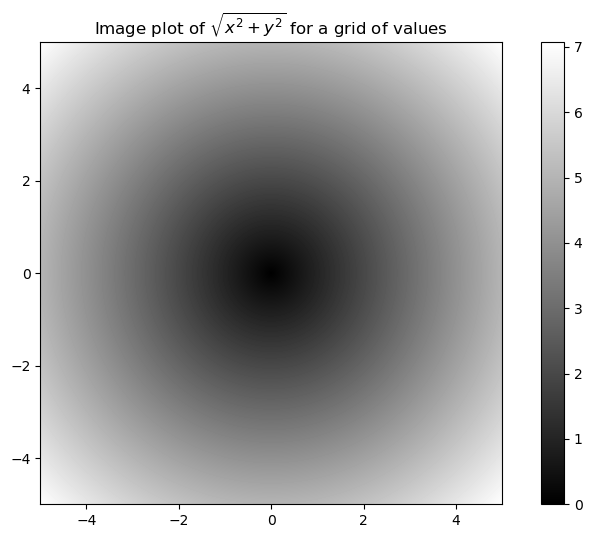

In [ ]:
# 시각화

import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [ ]:
# IPython에서 작업하는 경우 다음 명령어는 모든 플롯 창을 닫을 수 있음.

plt.close("all")

### 1.5.1. 배열 연산으로 조건부 표현하기

- numpy.where()
    - x if 조건 else y 같은 삼항식의 벡터화 버전임.

In [136]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [137]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [138]:
# 위와 완전히 동일한 명령어
# 조건과 두 배열을 사용

result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [139]:
# scalar도 가능

result2 = np.where(cond, xarr, 0)
result2

array([1.1, 0. , 1.3, 1.4, 0. ])

In [140]:
# np.where() 예시
# 조건과 두 스칼라 사용

arr = rng.standard_normal((4, 4))
print(arr)
line()

print(arr > 0)
print(np.where(arr > 0, 2, -2))

[[-1.6216 -0.1582  0.4495 -1.3436]
 [-0.0817  1.7247  2.6182  0.7774]
 [ 0.8286 -0.959  -1.2094 -1.4123]
 [ 0.5415  0.7519 -0.6588 -1.2287]]
--------------------------------------------------
[[False False  True False]
 [False  True  True  True]
 [ True False False False]
 [ True  True False False]]
[[-2 -2  2 -2]
 [-2  2  2  2]
 [ 2 -2 -2 -2]
 [ 2  2 -2 -2]]


In [141]:
# arr에서 양수의 요소는 2로, 음수면 arr값 그대로 갖음.
# 조건과 하나의 scalar와 하나의 배열

np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-1.6216, -0.1582,  2.    , -1.3436],
       [-0.0817,  2.    ,  2.    ,  2.    ],
       [ 2.    , -0.959 , -1.2094, -1.4123],
       [ 2.    ,  2.    , -0.6588, -1.2287]])

### 1.5.2. 수학 메서드와 통계 메서드

- 배열 클래스의 메서드
    - 배열 전체 혹은 배열의 한 축에 속하는 자료에서 통계를 계산하는 수학 함수 제공
    - 합(sum), 평균(mean), 표준편차(std)

In [142]:
import numpy as np

rng = np.random.default_rng(seed=12345)

arr = rng.standard_normal((5, 4))
print(arr)
line()

print(arr.mean())
print(np.mean(arr))
print(arr.sum())

[[-1.4238  1.2637 -0.8707 -0.2592]
 [-0.0753 -0.7409 -1.3678  0.6489]
 [ 0.3611 -1.9529  2.3474  0.9685]
 [-0.7594  0.9022 -0.467  -0.0607]
 [ 0.7888 -1.2567  0.5759  1.399 ]]
--------------------------------------------------
0.0010611661248891013
0.0010611661248891013
0.021223322497782027


In [144]:
# 축을 지정하여 지정 축을 따라 계산하고 한 차수 낮은 배열을 반환함.

print(arr.shape)
line()
print(arr.mean(axis=1))
line()
print(arr.sum(axis=0))

(5, 4)
--------------------------------------------------
[-0.3225 -0.3838  0.431  -0.0962  0.3768]
--------------------------------------------------
[-1.1087 -1.7845  0.2179  2.6965]


In [145]:
# cumsum은 sum을 하되, 누적 sum을 배열에 저장함.
# 다차원 배열에서 cumsum 같은 누적 함수는 크기(shape이 아님)가 동일한 배열을 반환함.

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [146]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

print(arr)
line()
print(arr.cumsum())

[[0 1 2]
 [3 4 5]
 [6 7 8]]
--------------------------------------------------
[ 0  1  3  6 10 15 21 28 36]


In [147]:
# 하지만 축을 지정해 부분적으로 계산하면 낮은 차수의 슬라이스를 반환함.

print(arr)
line()

print(arr.cumsum(axis=0))
line()

print(arr.cumsum(axis=1))
line()

[[0 1 2]
 [3 4 5]
 [6 7 8]]
--------------------------------------------------
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
--------------------------------------------------
[[ 0  1  3]
 [ 3  7 12]
 [ 6 13 21]]
--------------------------------------------------


- 기본 배열 기술 통계 메서드
    - sum: 배열 전체 혹은 특정 축에 대한 모든 원소의 합을 계산함. 크기가0인 배열의 sum 결과는 0임.
    - mean: 산술 평균. 크기가 0인 배열의 mean 결과는 NaN임.
    - std, var: 각각 표준편차(std)와 분산(var)을 구함. 선택적으로 자유도를 줄 수 있으며 분모의 기본값은 n임.
    - min. max: 최솟값과 최댓값
    - argmin, argmax: 최소 원소의 색인값과 최대 원소의 색인값
    - cumsum: 0부터 시작하는 각 원소의 누적합
    - cumprod: 1부터 시작하는 각 원소의 누적곱

### 1.5.3. 불리언 배열을 위한 메서드

- 불리언 배열에서 sum 메서드를 사용하면 True인 원소의 개수를 반환함.

In [ ]:
arr = rng.standard_normal(100)

print((arr > 0).sum()) # Number of positive values
print((arr <= 0).sum()) # Number of non-positive values

52
48


In [148]:
# ndarray의 메서드 any()는 배열에서 하나 이상의 True 값이 있는지 검사하고 불리언을 리턴함.
# ndarray의 메서드 all()는 배열의 모든 요소가 True인지 검사하고 불리언을 리턴함.
# 배열은 반드시 불리언이 아니어도 되며, 0이 아닌 요소는 모두 True로 간주함.

import numpy as np

bools = np.array([False, False, True, False])
print(~bools)
line()
print(bools.any())
line()
print(bools.all())
line()
# numpy에 정의된 all() 함수 사용
print(np.all(bools))

[ True  True False  True]
--------------------------------------------------
True
--------------------------------------------------
False
--------------------------------------------------
False


### 1.5.4. 정렬

- 배열의 정렬을 위해 numpy.sort() 또는 ndarray.sort() 사용
- 사용 시 미묘한 차이
    - ndarray.sort() : 정렬 결과를 배열에 바로 적용시킴.
    - numpy.sort(ndarray) : 정렬 결과를 복사본으로 return함.

In [149]:
# ndarray.sort() 적용

rng = np.random.default_rng(seed=12345)

arr = rng.standard_normal(6)

print(arr)
line()

arr.sort()  # 자기 객체로 return을 반환함.
print(arr)

[-1.4238  1.2637 -0.8707 -0.2592 -0.0753 -0.7409]
--------------------------------------------------
[-1.4238 -0.8707 -0.7409 -0.2592 -0.0753  1.2637]


In [150]:
# axis=0를 지정해 주어, axis를 따라 sort를 진행함.
arr = rng.standard_normal((5, 3))

print(arr)
line()

arr.sort(axis=0)
print(arr)


[[-1.3678  0.6489  0.3611]
 [-1.9529  2.3474  0.9685]
 [-0.7594  0.9022 -0.467 ]
 [-0.0607  0.7888 -1.2567]
 [ 0.5759  1.399   1.3223]]
--------------------------------------------------
[[-1.9529  0.6489 -1.2567]
 [-1.3678  0.7888 -0.467 ]
 [-0.7594  0.9022  0.3611]
 [-0.0607  1.399   0.9685]
 [ 0.5759  2.3474  1.3223]]


In [151]:
# axis=1를 지정해 주어, axis를 따라 sort를 진행함.
arr = rng.standard_normal((5, 3))

print(arr)
line()

arr.sort(axis=1)
print(arr)

[[-0.2997  0.9029 -1.6216]
 [-0.1582  0.4495 -1.3436]
 [-0.0817  1.7247  2.6182]
 [ 0.7774  0.8286 -0.959 ]
 [-1.2094 -1.4123  0.5415]]
--------------------------------------------------
[[-1.6216 -0.2997  0.9029]
 [-1.3436 -0.1582  0.4495]
 [-0.0817  1.7247  2.6182]
 [-0.959   0.7774  0.8286]
 [-1.4123 -1.2094  0.5415]]


In [152]:
arr = rng.standard_normal((3, 3))

print(arr)
line()

arr.sort() # 기본값 axis=1
print(arr)

[[ 0.7519 -0.6588 -1.2287]
 [ 0.2576  0.3129 -0.1308]
 [ 1.27   -0.093  -0.0662]]
--------------------------------------------------
[[-1.2287 -0.6588  0.7519]
 [-0.1308  0.2576  0.3129]
 [-0.093  -0.0662  1.27  ]]


In [153]:
# numpy.sort() 적용
# 파이썬 내장함수 sorted()와 비슷함. 복사본을 반환함.

arr2 = np.array([5, -10, 7, 1, 0, -3])

print(arr2)
line()

sorted_arr2 = np.sort(arr2) # 배열을 직접 변경하지 않고 복사본을 반환함.
print(sorted_arr2)
line()
print(arr2)

[  5 -10   7   1   0  -3]
--------------------------------------------------
[-10  -3   0   1   5   7]
--------------------------------------------------
[  5 -10   7   1   0  -3]


In [154]:
sorted_arr3 = sorted(arr2)
print(sorted_arr3)
line()
print(arr2)

[-10, -3, 0, 1, 5, 7]
--------------------------------------------------
[  5 -10   7   1   0  -3]


### 1.5.5. 집합 관련 함수

In [155]:
# 1d unique() 적용

names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
print(np.unique(names))

ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
print(np.unique(ints))

['Bob' 'Joe' 'Will']
[1 2 3 4]


In [156]:
# 위 코드와 동일한 결과

sorted(set(names))

['Bob', 'Joe', 'Will']

In [157]:
# 다차원 적용
# 집합은 순서가 없지만, numpy에서 ndarray로 표현을 할때 정렬이 되어 들어감.

names = np.array([["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"],
                  ["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"],
                  [1, 1, 2, 3, 4, 3, 10]])
np.unique(names)


array(['1', '10', '2', '3', '4', 'Bob', 'Joe', 'Will'], dtype='<U21')

In [ ]:
# numpy.in1d(기준배열, 조건배열) 함수
# 기준배열 요소에 조건배열 요소가 포함되면 True, 포함되지 않으면 False를 요소로 하는 배열을 return함.
# 매우 유용한 메서드임.

values = np.array([6, 0, 0, 3, 2, 5, 6])
print(np.in1d(values, [2, 3, 6]))

[ True False False  True  True False  True]


- 배열 집합 연산
    - unique(x): 배열 x에서 중복된 원소를 제거한 뒤 정렬해 반환함.
    - intersect1d(x, y): 배열 x와 y에 공통적으로 존재하는 원소를 정렬해 반환.
    - union1d(x, y): 두 배열의 합집합을 반환함.
    - in1d(x, y): x의 원소가 y의 원소에 포함되는지 나타내는 불리언 배열을 반환
함.
    - setdiff1d(x, y): x와 y의 차집합을 반환.
    - setxor1d(x, y): 한 배열에는 포함되지만 두 배열 모두에는 포함되지 않는 원소들의 집합인 대칭차집합을 반환함.

### 1.5.6. 배열 연산 연습문제

- 문제1: 다음 문제를 푸세요.
    - 다음 함수를 정의하세요: f(x, y) = sin(x) * cos(y)
    -  -2π부터 2π까지 범위에서 x와 y 좌표를 계산하는 2차원 그리드 포인트를 생성하세요. 그리드 포인트에서 각 점에서 함수 f(x, y)의 값을 계산하고 이를 2차원 배열로 저장하세요.

- 문제2: 다음 리스트를 1차원 배열로 만들고, 배열에서 짝수인 요소는 그대로 두고, 홀수인 요소는 1을 더한 새로운 배열을 생성하세요. 즉, 조건에 따라 배열의 값을 변경하고 그 결과를 출력하세요.
    - 리스트: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

- 문제3: 다음 리스트를 배열로 만들고, 배열에서 적어도 하나의 요소가 'True'를 가지는지 확인하고, 만약 그렇다면, 그 배열에서 'True'의 개수가 몇 개인지 보이세요.
    - 리스트: [True, False, True, False, False]

- 문제4: 다음 리스트를 배열로 만들고, 배열을 오름차순으로 정렬하세요. 그리고 배열의 각 원소의 순위를 새로운 배열로 만들고 출력하세요. (동률인 경우 평균 순위를 사용하세요)
    - 리스트: [9, 2, 6, 3, 5]

## 1.6. 배열 데이터의 파일 입출력

- 넘파이는 디스크에서 텍스트나 바이너리 형식의 데이터를 불러오거나 저장할 수 있음.
- 넘파이의 내장 이진 형식에 대해 알아봄.
- 배열 데이터를 효과적으로 디스크에 저장하고 불러오는 함수
    - numpy.save(): 저장하는 함수
    - numpy.load() : 불러오는 함수
- 배열은 기본적으로 압축되지 않은 원시(raw) 바이너리 형식의 .npy 파일로 저장됨.

In [ ]:
# np.save('파일명', 배열)
# 파일명에 .npy 확장자를 쓰지 않으면 자동으로 추가됨.

arr = np.arange(10)
np.save("some_array.npy", arr)

In [ ]:
# numpy.load('파일명')
# 이때는 파일명에 반드시 확장자명 .npy를 붙여야 함.

np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# numpy.savez() 함수를 사용하면 여러 개의 배열을 압축된 형식으로 저장할 수 있음.
# 확장자는 .npz 임.
# 저장하려는 배열은 키워드 인수 형태로 전달함.
# dictionary의 key, value로 데이터가 저장되어 있다고 생각해도 됨.

np.savez("array_archive.npz", a=arr, b=arr)

In [ ]:
# .npz 파일을 불러올 때는 각 배열을 필요할 때 불러올 수 있도록 딕셔너리 형식의 객체에 저장함.
# 정확하게는 딕셔너리는 아님.

arch = np.load("array_archive.npz")
print(type(arch))

arch["b"]

<class 'numpy.lib.npyio.NpzFile'>


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# 압축이 잘되는 형식의 데이터라면 numpy.savez_compressed()를 사용함.

np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

In [ ]:
# 다음은 위에서 만든 .npy, npz 파일 지우는 명령어

# !rm some_array.npy
# !rm array_archive.npz
# !rm arrays_compressed.npz

## 1.7. 선형 대수

- 행렬의 곱셈, 분할, 행렬식, 정사각행렬 등 계산

In [158]:
# 행렬곱 연산

x = np.array([[1., 2., 3.],
              [4., 5., 6.]])
y = np.array([[6., 23.],
              [-1, 7],
              [8, 9]])
print(x.shape)
print(y.shape)

print(x.dot(y))

(2, 3)
(3, 2)
[[ 28.  64.]
 [ 67. 181.]]


In [159]:
# 위 예시와 동일한 결과

print(np.dot(x, y))
line()
print(x @ y)

[[ 28.  64.]
 [ 67. 181.]]
--------------------------------------------------
[[ 28.  64.]
 [ 67. 181.]]


In [161]:
# (2, 3) 내적 (3,)
# (2, 3) 내적 (3, 1) 이라고 생각하고 계산하고, 결국 결과는 행렬이 아닌 요소 2개를 갖는 벡터임.

result = x @ np.ones(3)

print(result.shape)
print(result)

(2,)
[ 6. 15.]


In [165]:
# numpy.linalg는 행렬의 분할과 역행렬, 행렬식과 같은 연산을 포함함.
# 역행렬은 정사각행렬이어야 함.
# 행렬 @ 역행렬 --> 단위행렬

from numpy.linalg import inv, qr

X = rng.standard_normal((5, 3))

# 행렬곱
mat = X.T @ X
print(mat.shape)
print(mat)
line()

# 역행렬
invmat = inv(mat)
print(invmat.shape)
print(invmat)
line()

# 단위행렬
print(mat @ invmat)
line()
print(invmat @ mat)

(3, 3)
[[ 1.3417  0.2838 -0.4905]
 [ 0.2838  2.0685  1.3155]
 [-0.4905  1.3155  5.7883]]
--------------------------------------------------
(3, 3)
[[ 0.8252 -0.1843  0.1118]
 [-0.1843  0.6063 -0.1534]
 [ 0.1118 -0.1534  0.2171]]
--------------------------------------------------
[[ 1. -0.  0.]
 [-0.  1.  0.]
 [-0.  0.  1.]]
--------------------------------------------------
[[ 1. -0. -0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]]


## 1.8. numpy 기초 final 연습문제

- 문제1) 다음 코드를 보고, 어떤 목적의 프로그램인지 해석하세요. 특히 random.randint(0, 1) 부분을 잘 해석해야 해요.
```python
    import random
    position = 0
    walk = [position]
    nsteps = 1000
    for _ in range(nsteps):
        step = 1 if random.randint(0, 1) else -1
        position += step
        walk.append(position)
```

- 문제2) 다음 코드를 실행하여 코드의 결과를 시각화 하세요.
```python
    plt.figure()
    plt.plot(walk[:100])
```

- 문제3) 문제1의 코드를 numpy를 이용하여 다시 작성하세요.
    - nsteps, walk 변수명은 그대로 사용하세요.
    - numpy.random, np.random.default_rng, rng.integer, np.where, ndarray.cumsum을 적절히 이용하세요.

- 문제4) walk의 최소값, 최대값을 구하세요.

- 문제5) 처음 시작점에서부터 거리 10 이상 떨어진 거리에 도달하기까지의 step을 구하는 코드를 작성하세요.

- 문제6) 지금까지는 스텝 1000번의 계단 오르기 1회를 진행하는 프로그램이었어요. numpy 배열을 이용하여 1000번 계단 오르기 100회를 진행하는 코드를 작성하세요.

- 문제7) 문제6에 대해, walks의 최소값, 최대값을 구하세요.

- 문제8) walk의 누적합이 30 혹은 -30이 넘는 계단 오르기가 있다면, 그 개수가 몇 개인지 계산하세요.

- 문제9) walk의 누적합이 30 혹은 -30이 넘는 계단 오르기에 대해 기준점을 넘는 최소 시점을 계산하세요.

- 문제10) walk의 누적합이 30 혹은 -30이 넘는 계단 오르기에 대해 기준점을 넘는 최소 시점의 평균을 계산하세요.